## Plot the locations of all profiles

In [1]:
ymin=2010;mmin=1;dmin=1
ymax=2010;mmax=4;dmax=30
# depth of the desired comparison profile in m
depthmin=1500
# radius of the circle around the profile location in which we take the modeled profiles, in °  
radius_max=0.25
# period of time around the profile sampling date in which we take the modeled profiles, in days
period=5
# minimum amount of model profiles to be considered to make a significant statistical comparison, for instance in a 1° square and 30-days window we have 2.6 millions modeled profiles, in a 0.5°x10 days 216 000
number_of_model_profiles=100000


In [2]:
# Parameters
ymin = 2010
mmin = 1
dmin = 1
ymax = 2010
mmax = 4
dmax = 30
depthmin = 1000
radius_max = 0.25
period = 5
number_of_model_profiles = 100000


In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import json
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import dask
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import glob as glob
import time
from datetime import date
import io
import json
import seawater
import sys
import cmocean

In [4]:
datemin=datetime.date(ymin,mmin,dmin)
datemax=datetime.date(ymax,mmax,dmax)
jsonfile='txt/MEDWEST60-BLBT02_'+str(datemin)+'-'+str(datemax)+'_'+str(depthmin)+'m_'+str(radius_max)+'x'+str(period)+'d_'+str(number_of_model_profiles)+'.json'
sourcefile=open(str(jsonfile),'rU',encoding='utf-8')
infos=json.load(sourcefile)
nb_profilesEN4=len(infos)
list_profiles=infos.keys()

all_lat=np.zeros((nb_profilesEN4))
all_lon=np.zeros((nb_profilesEN4))
    
for prof in np.arange(nb_profilesEN4):
    reference =  str(list(list_profiles)[prof])
    lat_prof = infos[reference]['latitude']
    lon_prof = infos[reference]['longitude']
    all_lat[prof]=lat_prof
    all_lon[prof]=lon_prof


<ipython-input-4-97982cd7f6b5>:4: DeprecationWarning: 'U' mode is deprecated
  sourcefile=open(str(jsonfile),'rU',encoding='utf-8')


In [5]:
# location and name of the maskfile of the model configuration
maskfile='/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/mesh_mask.nc'
ds=xr.open_dataset(maskfile)
lat=ds.nav_lat
lon=ds.nav_lon
tmask=ds.tmask
batfile='/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_Bathymetry_v3.3.nc4'
dsb=xr.open_dataset(batfile)
bathy=dsb.Bathymetry
bathy_mask=np.ma.masked_where(tmask[0,0]==0.,bathy)
latmin,latmax,lonmin,lonmax=(lat.min(),lat.max(),lon.min(),lon.max())
datemin=datetime.date(ymin,mmin,dmin)
datemax=datetime.date(ymax,mmax,dmax)


In [6]:
def map_profiles_from_jsonfile(all_lat,all_lon):
    fig, axs = plt.subplots(1,2, figsize=(15, 7.5), gridspec_kw={'width_ratios': [4, 1]}, subplot_kw={'projection': ccrs.PlateCarree()})
    axs = axs.ravel()
    axs[0].set_extent((lonmin, lonmax, latmin, latmax))
    pcolor=axs[0].pcolormesh(lon,lat,bathy_mask,transform=ccrs.PlateCarree(),
                         cmap=cmocean.cm.deep,vmin=0,vmax=4000)
    axs[0].coastlines(resolution="10m")
    gl = axs[0].gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    axs[0].tick_params('both',labelsize=22)

    cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.75,label='m',ax=axs[0])
    axs[0].scatter(all_lon, all_lat, c='r', linewidth='0', s=18);
    axs[0].set_title('There are '+str(len(all_lon))+' EN4 profiles', size=20);

    textstr = '\n'.join((
            ' simulation = MEDWEST60-BLBT02',
            ' dates = '+str(datemin)+' '+str(datemax),
            ' radius max = '+str(radius_max)+'°',
            ' period = '+str(period)+'d',
            ' depth min = '+str(depthmin)+'m',
            ' nb_profiles = '+str(number_of_model_profiles)))        
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs[1].text(0.05, 0.95, textstr, transform=axs[1].transAxes, fontsize=14,verticalalignment='top', bbox=props)
    axs[1].axis('off')
    fig.tight_layout()

    plt.savefig('plots/map-profiles-MEDWEST60_'+str(datemin)+'-'+str(datemax)+'_'+str(depthmin)+'m_'+str(radius_max)+'x'+str(period)+'d_'+str(number_of_model_profiles)+'.png')


/gpfswork/rech/yrf/rote001/miniconda2/envs/seawater/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/gpfswork/rech/yrf/rote001/miniconda2/envs/seawater/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


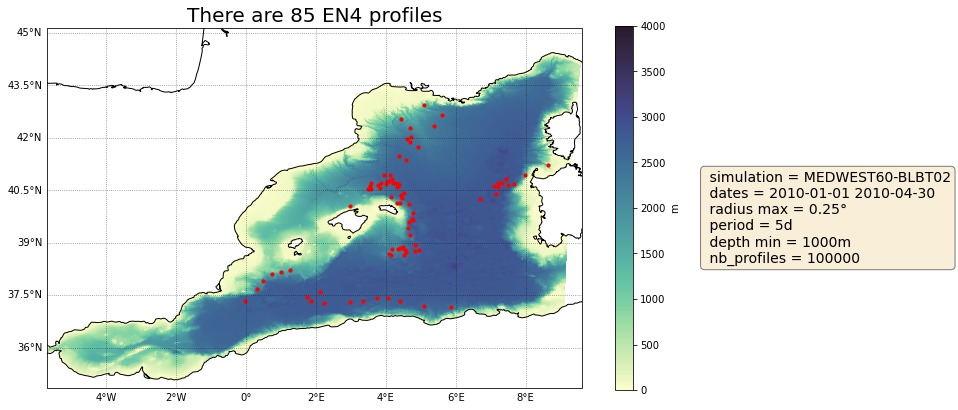

In [7]:
map_profiles_from_jsonfile(all_lat,all_lon)